In [3]:
## Principal Component Analysis ##

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
df=pd.DataFrame(wine['data'],columns=wine['feature_names'])

In [7]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


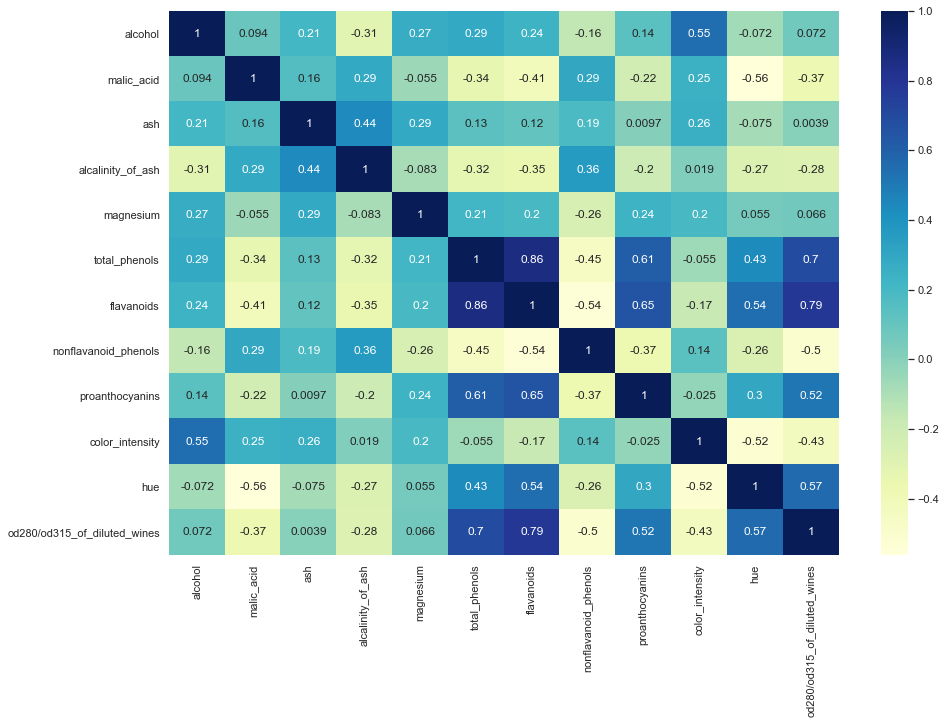

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca=PCA(n_components=2)

In [14]:
pca.fit(scaled_data)

PCA(n_components=2)

In [15]:
x_pca=pca.transform(scaled_data)

In [16]:
scaled_data.shape

(178, 13)

In [17]:
x_pca.shape

(178, 2)

In [18]:
x_pca

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

Text(0, 0.5, 'Second principle component')

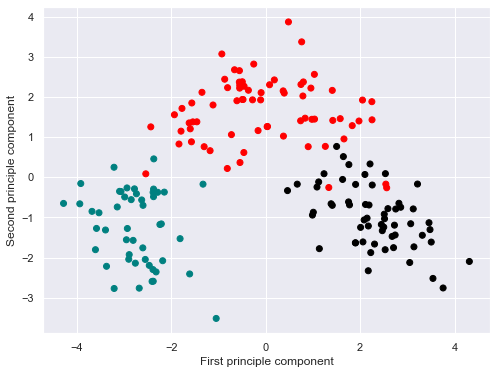

In [61]:
plt.figure(figsize=(8,6))
pc1 = x_pca[:,0]
pc2 = x_pca[:,1]
colors = np.array(["black", "red", "teal"])
plt.scatter(pc1, pc2, c=colors[wine['target']])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [20]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [21]:
from sklearn.datasets import load_wine
wine = load_wine()
X = pd.DataFrame(wine.data, columns = wine.feature_names)
# change to categorical from codes(array of ints)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [22]:
X.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [23]:
y

['class_0', 'class_0', 'class_0', 'class_0', 'class_0', ..., 'class_2', 'class_2', 'class_2', 'class_2', 'class_2']
Length: 178
Categories (3, object): ['class_0', 'class_1', 'class_2']

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [25]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)

new_X = pd.DataFrame(data = principal_components, columns = ['PC1','PC2','PC3'])

In [26]:
new_X.head()

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


[36.2 19.2 11.1]


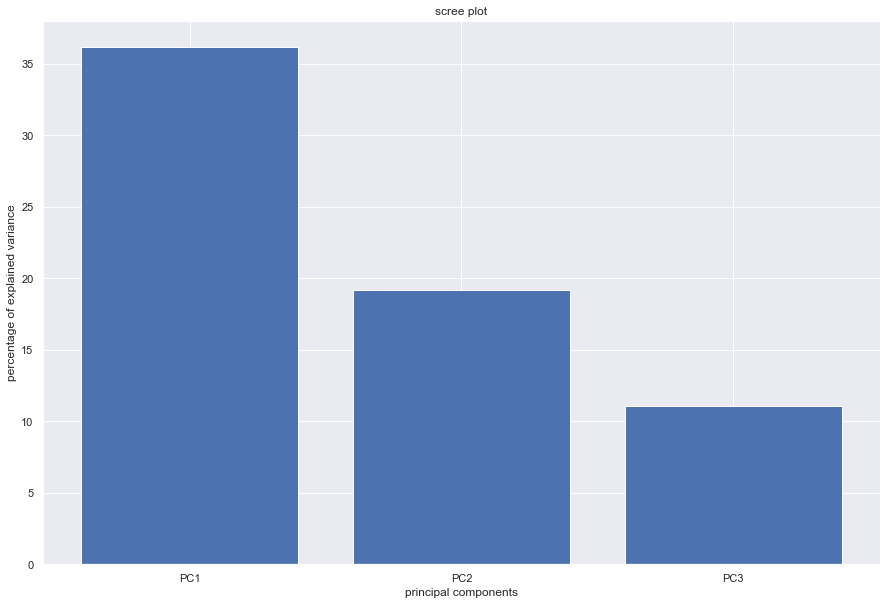

In [42]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
print(per_var)

label = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height = per_var, tick_label = label)

plt.ylabel('percentage of explained variance')
plt.xlabel('principal components')
plt.title('scree plot')
plt.show()

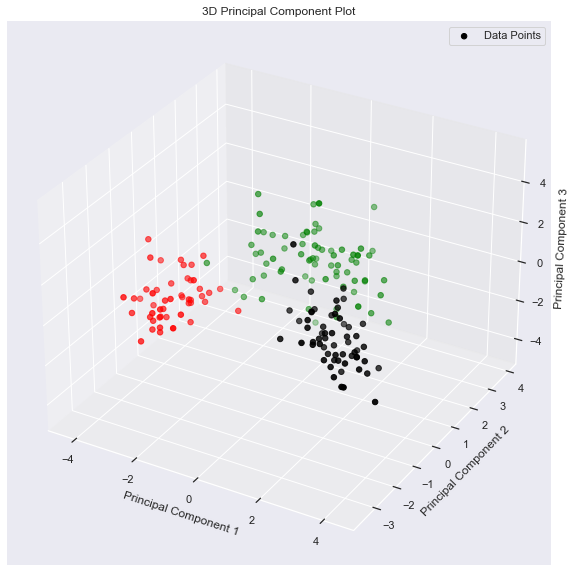

In [58]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]
pc3 = principal_components[:, 2]

colors = np.array(["black", "green", "red"])

# Plotting the data points in the new 3D space
ax.scatter(pc1, pc2, pc3, c=colors[wine['target']], marker='o',s = 30, label='Data Points')

# Customize the plot with labels and a legend
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Principal Component Plot')
ax.legend()

plt.show()